In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('../datasets/Position_Salaries.csv')
X = dataset.iloc[: , 1:-1].values
y = dataset.iloc[: , -1].values

In [4]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [6]:
print(y)
y.shape

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


(10,)

In [9]:
y=y.reshape(len(y),1)

In [10]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [13]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()

X = sc_x.fit_transform(X)
y = sc_y.fit_transform(y)

In [14]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [15]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [16]:
from sklearn.svm import SVR
svr_regressor = SVR(kernel='rbf')

svr_regressor.fit(X, y)
 

/home/sruti/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [18]:
sc_y.inverse_transform(svr_regressor.predict(sc_x.fit_transform([[6.5]])).reshape(-1,1))

array([[131106.77303274]])

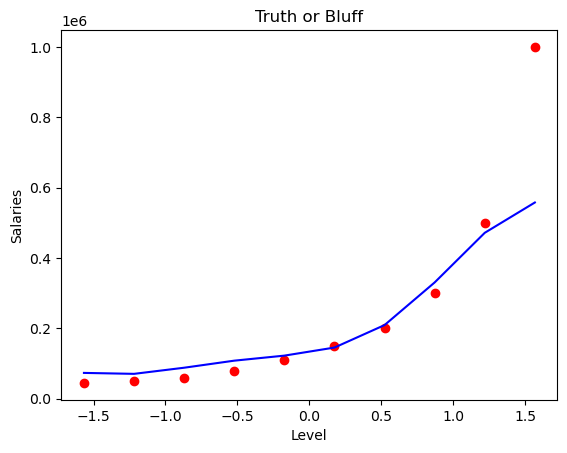

In [28]:
plt.scatter(sc_x.inverse_transform(X),sc_y.inverse_transform(y), color='red')
plt.plot(sc_x.inverse_transform(X),sc_y.inverse_transform(svr_regressor.predict(X).reshape(-1,1)), color='blue')

plt.title("Truth or Bluff")
plt.xlabel("Level")
plt.ylabel("Salaries")
plt.show()